In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import torch
from datasets import load_dataset
raw_datasets = load_dataset("glue", "sst2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [ ]:
pd = raw_datasets['train'].to_pandas()
pd

sentence  label    idx
0           hide new secretions from the parental units       0      0
1                   contains no wit , only labored gags       0      1
2      that loves its characters and communicates som...      1      2
3      remains utterly satisfied to remain the same t...      0      3
4      on the worst revenge-of-the-nerds clichés the ...      0      4
...                                                  ...    ...    ...
67344                               a delightful comedy       1  67344
67345                   anguish , anger and frustration       0  67345
67346  at achieving the modest , crowd-pleasing goals...      1  67346
67347                                  a patient viewer       1  67347
67348  this new jangle of noise , mayhem and stupidit...      0  67348

[67349 rows x 3 columns]

In [ ]:
# 2. Class Distribution
labels = raw_datasets["train"]["label"]
label_counts = torch.bincount(torch.tensor(labels))
print("Class Distribution:")
print(label_counts)

# 3. Text Length
text_lengths = [len(text.split()) for text in raw_datasets["train"]["sentence"]]
print("Max text length:", max(text_lengths))
print("Min text length:", min(text_lengths))
print("Average text length:", sum(text_lengths) / len(text_lengths))




Class Distribution:
tensor([29780, 37569])
Max text length: 52
Min text length: 1
Average text length: 9.409553222765


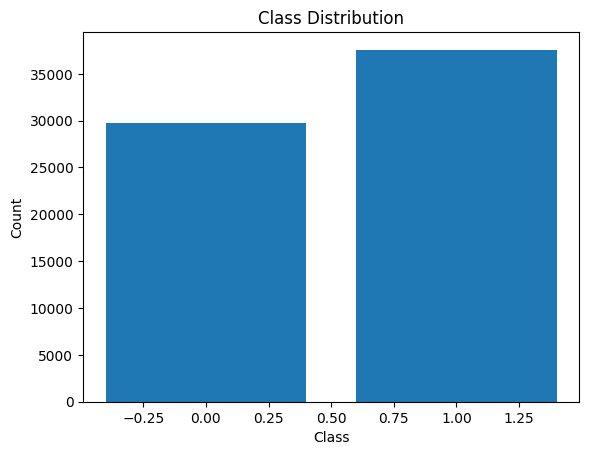

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Get labels
labels = raw_datasets["train"]["label"]

# Count occurrences of each label
label_counts = torch.bincount(torch.tensor(labels))

# Plotting the distribution
plt.bar(range(len(label_counts)), label_counts.numpy())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


Most similar words to 'good': [('great', 0.7461616396903992), ('fine', 0.7106402516365051), ('b-12', 0.7099566459655762), ('pianist', 0.7059271335601807), ('documentarian', 0.6861289739608765), ('waste', 0.6854809522628784), ('no-frills', 0.6669365763664246), ('skeleton', 0.665319561958313), ('children', 0.6650850176811218), ('idea', 0.664471447467804)]


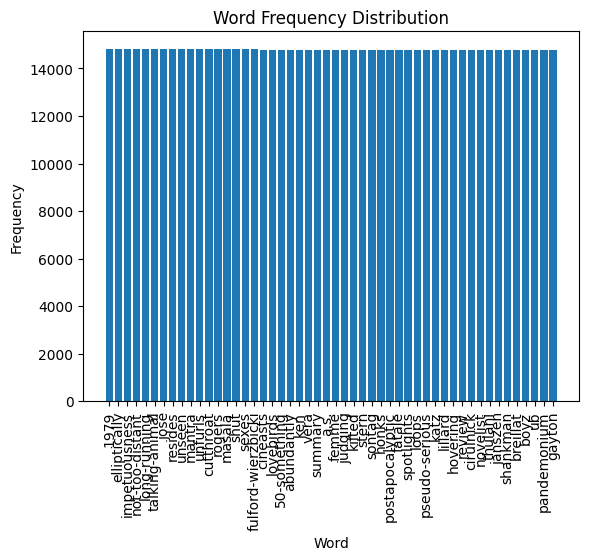

In [ ]:
# 4. Word2Vec Analysis
from gensim.models import Word2Vec

sentences = raw_datasets["train"]["sentence"]

# Tokenize the sentences
tokenized_sentences = [sentence.split() for sentence in sentences]
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)


# Example: Get most similar words to a given word
print("Most similar words to 'good':", word2vec_model.wv.most_similar("good"))

# Plotting word frequency distribution
word_frequencies = sorted(word2vec_model.wv.key_to_index.items(), key=lambda x: x[1], reverse=True)
words, frequencies = zip(*word_frequencies[:50])  # Choose top 50 words by frequency
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()

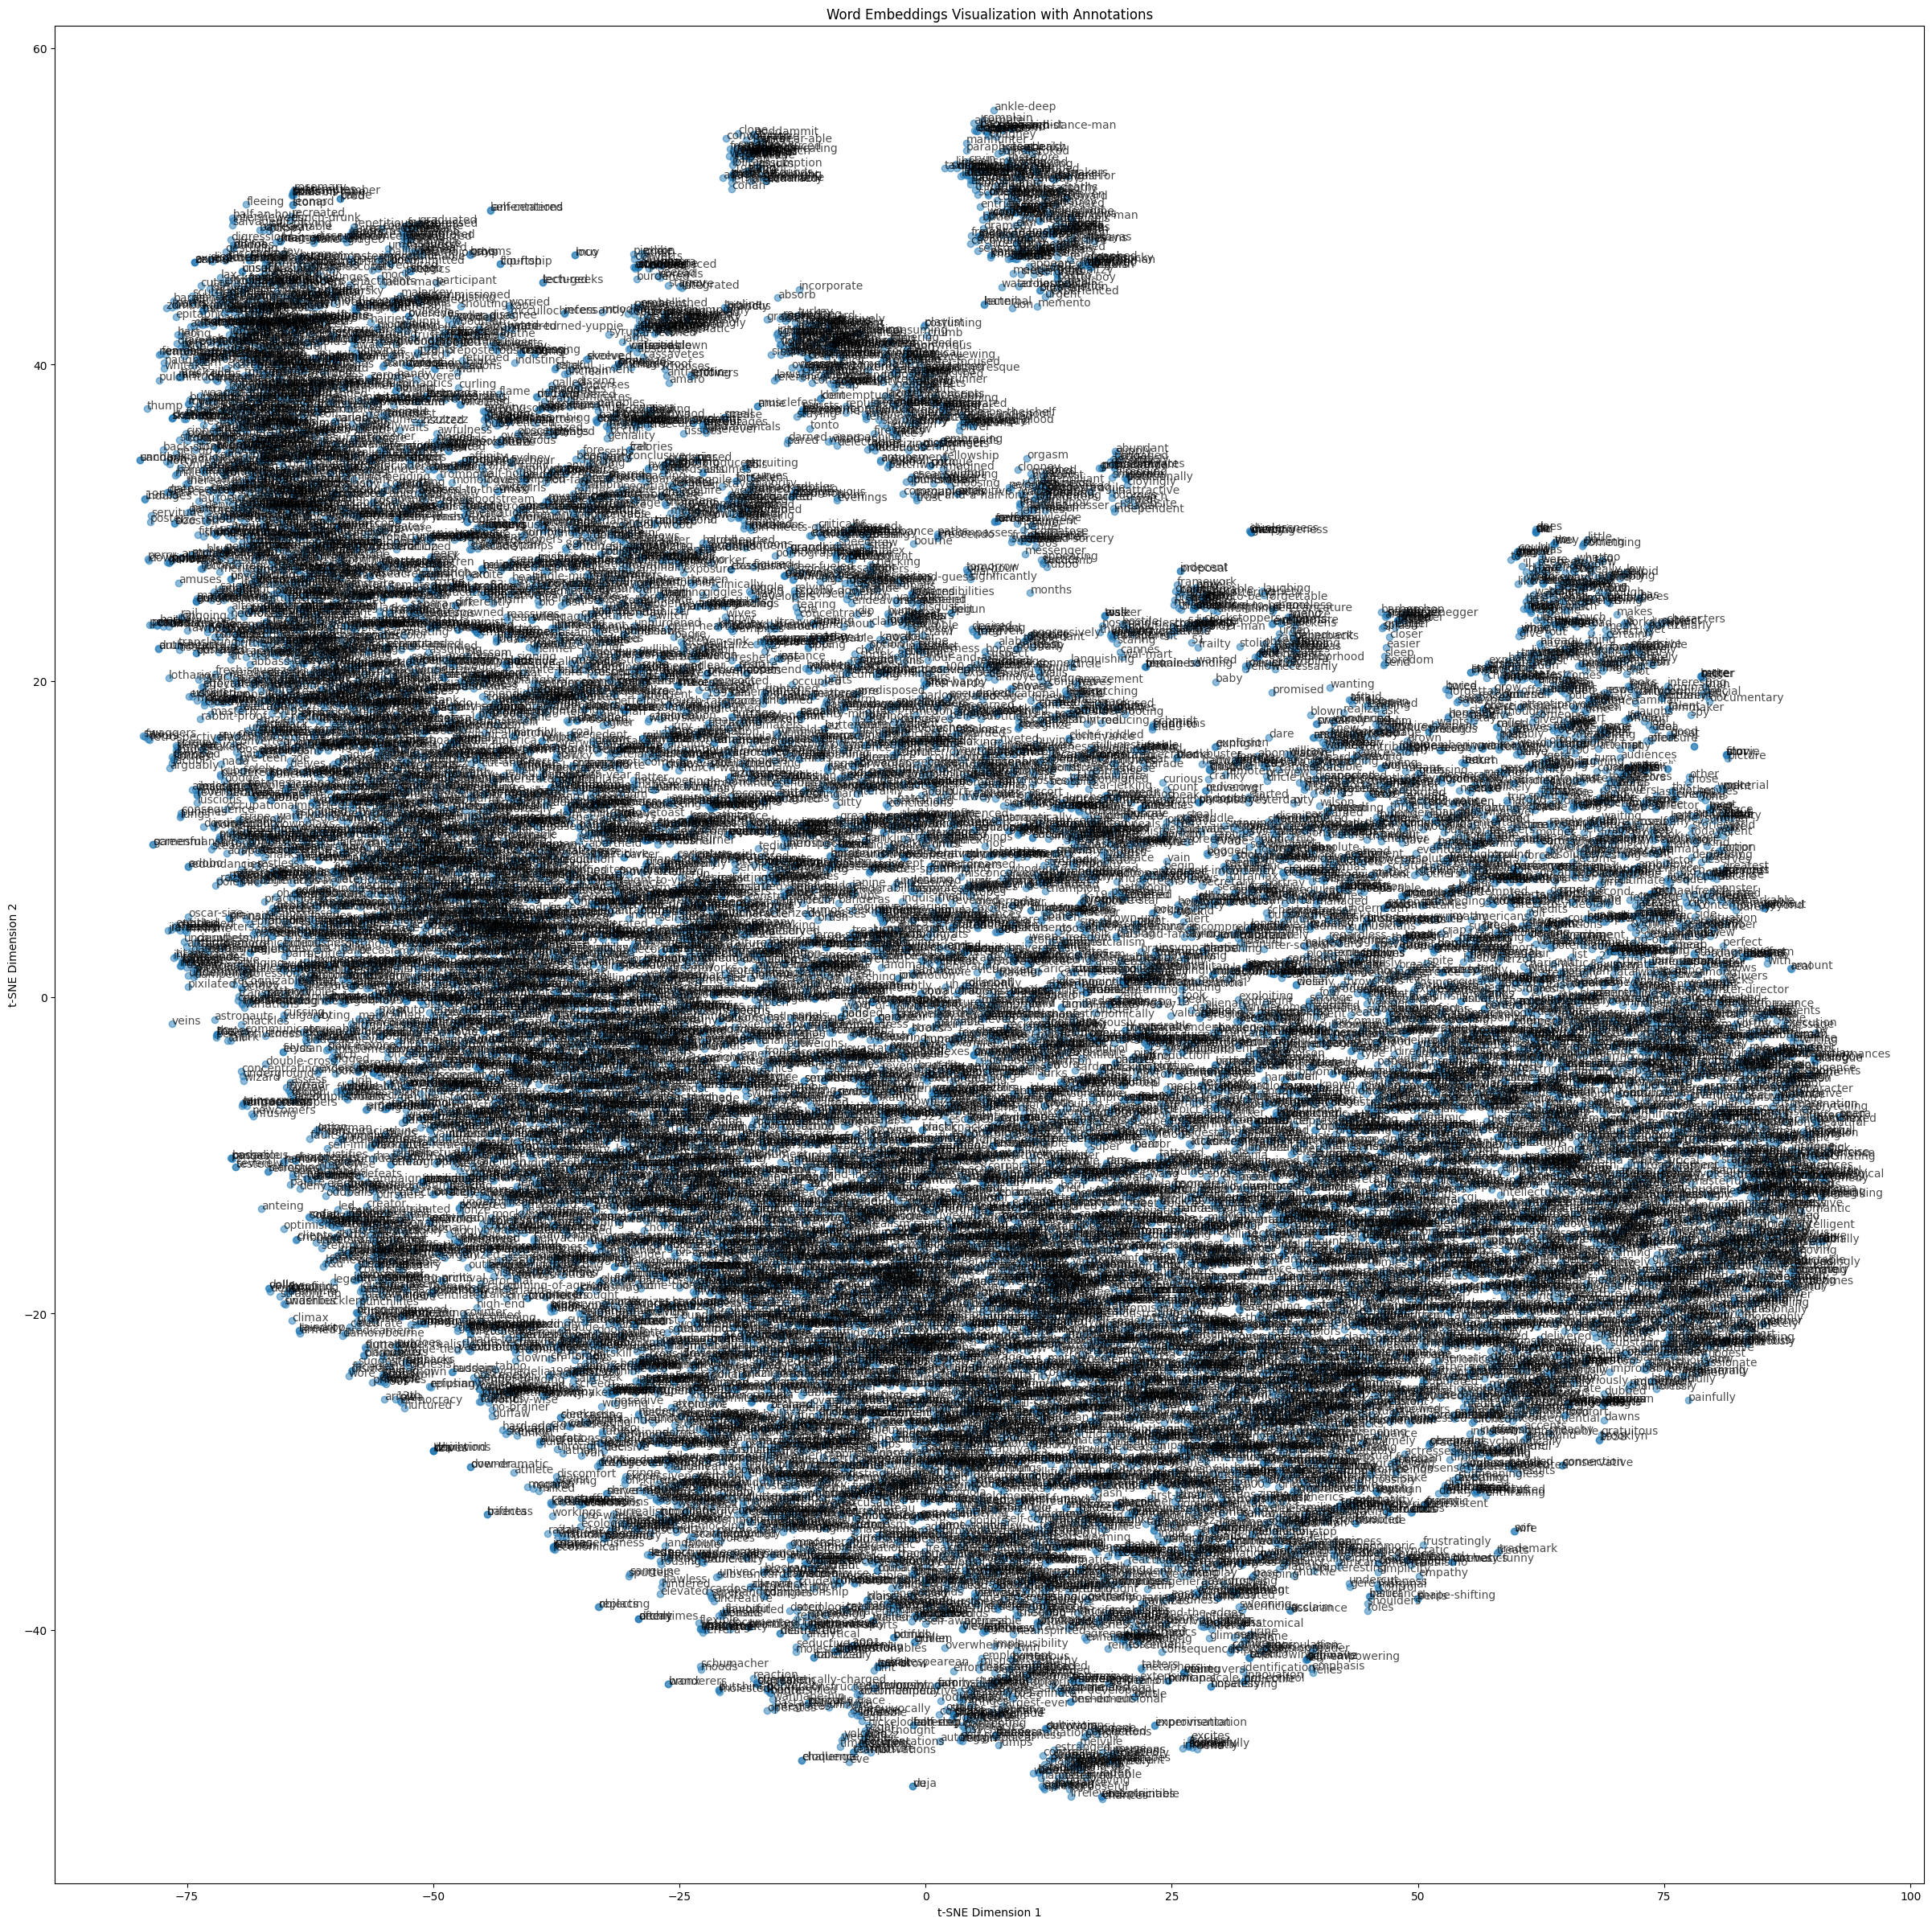

In [ ]:
# 5. Word Embedding Visualization
# Visualizing Word2Vec embeddings using t-SNE
from sklearn.manifold import TSNE
import numpy as np
# Get Word2Vec embeddings
word_embeddings = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.key_to_index.keys()])

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_embeddings_tsne = tsne.fit_transform(word_embeddings)

# Enable interactive mode for zooming
plt.figure(figsize=(30,30))
plt.scatter(word_embeddings_tsne[:, 0], word_embeddings_tsne[:, 1], alpha=0.5)

# Add annotations for each data point (word)
for i, word in enumerate(word2vec_model.wv.key_to_index.keys()):
    plt.annotate(word, (word_embeddings_tsne[i, 0], word_embeddings_tsne[i, 1]), alpha=0.7)

plt.title('Word Embeddings Visualization with Annotations')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.gca().set_aspect('auto', adjustable='box')  # Set aspect ratio to 'auto' for interactive zooming
plt.show()



In [ ]:
# 4. Tokenization
from transformers import AutoTokenizer, DataCollatorWithPadding
checkpoint = "bert-base-uncased" #we will use bert base uncased for fine tune
tokenizer = AutoTokenizer.from_pretrained(checkpoint) #get the tokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
example_text = raw_datasets["train"]["sentence"][0]
tokens = tokenizer.tokenize(example_text)
print("Example Text:", example_text)
print("Tokenized Text:", tokens)

Example Text: hide new secretions from the parental units 
Tokenized Text: ['hide', 'new', 'secret', '##ions', 'from', 'the', 'parental', 'units']
